# Análise Exploratória da NBA (Luka Doncic e LeBron James)
## Trabalho Final de Computação em Estatística 2 - Python (2/2020)
### Prof. Dr. Eduardo Monteiro de Castro Gomes
**Grupo:** <br/>
Daniel 200016580 <br/>
Davi 200016741 <br/>
Hermes 190099682 <br/>
Igor 180122207

In [1]:
# Importando as bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from scipy.stats import pearsonr

# Configurando a opção de exibição dos decimais
pd.options.display.float_format = '{:.2f}'.format

### 1. Introdução

<img src=img/ldHead.png />

Luka Doncic é um caso ABSURDO de sucesso internacional: profissional pelo **Real Madrid** aos **16 anos**, campeão do EuroBasket pela **Eslovênia** (e membro do quinteto ideal do torneio) aos **17** e campeão da Euroliga (incluindo MVP do torneio e das Finais) aos **19**. Nenhum outro jogador conseguiu tanto sucesso tão cedo na Europa quanto ele \[...\] (https://bolapresa.com.br/quem-tem-medo-de-luka-doncic/).

Agora, finalmente na NBA, com algumas temporadas na bagagem, o prêmio de novato do ano e incluso em discussões de MVP, vamos analisar esse fenômeno do basquete mundial e compará-lo a uma outra lenda, ainda em atividade: LeBron James

<img src=img/ljHead.png />

LeBron James lotava ginásios antes mesmo de chegar na NBA. Foi considerado o próximo talento do nível Michael Jordan desde cedo e, apesar da pressão envolvida nisso, cultiva até hoje uma carreira que comprova isso. Com quatro títulos da NBA, 4 MVPs, 17 seleções de allstar e diversos outros prêmios, o jogador coloca sua marca na história não só nas mentes de quem o viu jogar, mas nas estatísticas também. 

<img src=img/statsLeaderboard.png />

*(https://www.basketball-reference.com/leaders/)

### 2. Lendo os dados

Serão utilizados os dados dos jogadores em cada partida que atuaram e também os dados
condensados da carreira por temporada. <br/>
Os dados foram obtidos da própria NBA através do
site stats.nba.com, utilizando o pacote python nba_api <br/>
Arquivos de dados e script de extração em https://github.com/Hermezilla/trabalhoCE2


In [2]:
# Lendo os arquivos preparados anteriormente
ld = pd.read_csv('Luka Doncic.csv')
lj = pd.read_csv('LeBron James.csv')
ldC = pd.read_csv('Luka Doncic Career.csv')
ljC = pd.read_csv('LeBron James Career.csv')

In [3]:
#Juntando os dados
ld['Name'] = 'Luka Doncic'
lj['Name'] = 'LeBron James'

juntos = pd.concat([ld,lj])

In [4]:
#Dados do Luka Doncic na temporada atual
ld2021 = ldC[ldC['SEASON_ID'] == '2020-21']

#Dados do LeBron James na temporada atual
lj2021 = ljC[ljC['SEASON_ID'] == '2020-21']

#Juntando e colocando indices
juntos2021 = pd.concat([ld2021,lj2021])
juntos2021.rename(index={2: 'Luka Doncic', 17: 'LeBron James'}, inplace=True)

#Comparação da temporada atual até agora
juntos2021.T

,Luka Doncic,LeBron James
PLAYER_ID,1629029,2544
SEASON_ID,2020-21,2020-21
LEAGUE_ID,0,0
TEAM_ID,1610612742,1610612747
TEAM_ABBREVIATION,DAL,LAL
PLAYER_AGE,22.0,36.0
GP,64,43
GS,64,43
MIN,2207.0,1448.0
FGM,634,400


### 3. Exploração dos dados

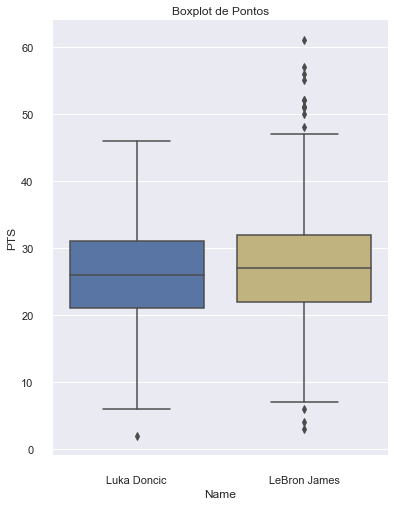

In [5]:
#Boxplot da distribuição de pontos
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(6,8)})

sns.boxplot(x="Name", y="PTS",
            palette=["b", "y"],
            data=juntos).set_title('Boxplot de Pontos')
sns.despine(offset=10, trim=True)

#### BoxPlot de PONTOS. O que entendemos disso?

Logo de cara percebemos que os gráficos dos dois jogadores são bastante semelhantes em todos os apsectos. A maioria dos dados estão concentrados entre 22 e 32 pontos por partida. Todos os quartis (e até os limites inferiores e superiores) do Doncic tem valores ligeiramente mais baixos. LeBron James também apresenta mais outliers, tanto para cima quanto para baixo. 

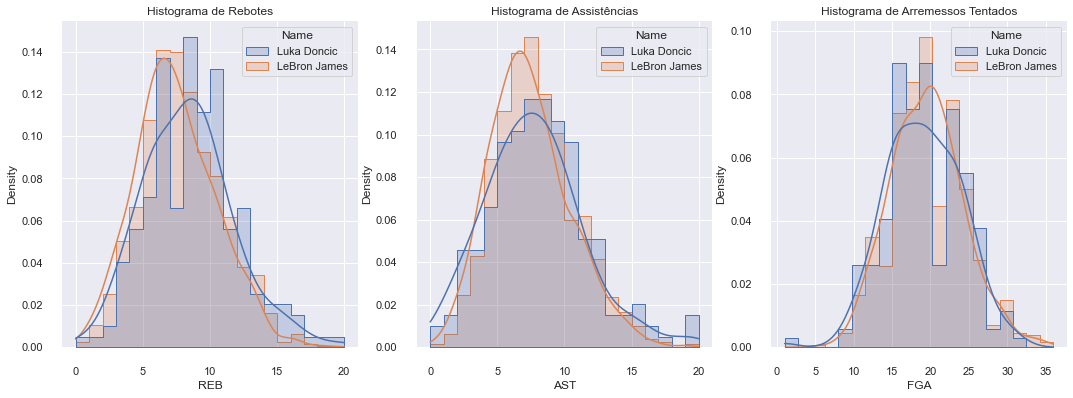

In [6]:
#Histogramas das densidades de rebotes, assistências e arremessos tentados
sns.set(rc={'figure.figsize':(18,6)})

fig, axs = plt.subplots(ncols=3)

sns.histplot(
    juntos, x="REB", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[0]
).set_title('Histograma de Rebotes')

sns.histplot(
    juntos, x="AST", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[1]
).set_title('Histograma de Assistências')

sns.histplot(
    juntos, x="FGA", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[2]
).set_title('Histograma de Arremessos Tentados')

sns.despine(offset=10, trim=True)

#### Histogramas de REBOTES, ASSISTÊNCIAS e ARREMESSOS TENTADOS. O que entendemos disso?

Percebemos no histograma de rebote que a concentração de Luka Doncic é um pouco mais a direita, ou seja, há indícios que o número de rebotes por jogo dele seja maior, mas a curva é mais baixa, indicando menor frequência. LeBron James é mais consistente e parece pegar perto de 6 rebotes na maioria dos jogos. Isso também acontece no histograma de assistências, embora Luka tenha tido muito mais jogos sem assistências (ou com poucas) na carreira. 
<br/><br/>
Já o gráfico de arremessos tentados é bastante similar. Ambos os jogadores arremessam bastante durante as partidas e tem até uma variância incrivelmente parecida.
<br/><br/>
Isso comprova a intuição que motivou o trabalho. Os dois jogadores de fato tem semelhanças em seu estilo de jogo e importância no time. 

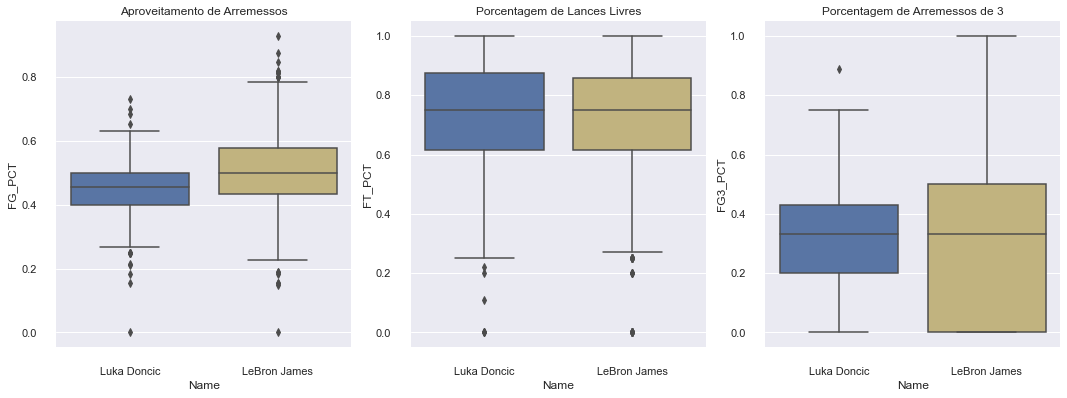

In [7]:
#Boxplots das porcentagens de aproveitamento de arremessos gerais, lances livres e de longa distância
sns.set(rc={'figure.figsize':(18,6)})

fig, axs = plt.subplots(ncols=3)

sns.boxplot(x="Name", y="FG_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[0]
).set_title('Aproveitamento de Arremessos')

sns.boxplot(x="Name", y="FT_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[1]
).set_title('Porcentagem de Lances Livres')

sns.boxplot(x="Name", y="FG3_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[2]
).set_title('Porcentagem de Arremessos de 3')

sns.despine(offset=10, trim=True)

#### Boxplots das porcentagens de aproveitamento de arremessos gerais, lances livres e de longa distância. O que entendemos disso?

Quando se trata das porcentagens de arremessos, o gráfico central, que mostra o aproveitamento de lances livres, ainda vemos semelhanças consideráveis. 
<br/><br/>
No entanto, já temos alguns pontos de divergência nas outras imagens. O primeiro Boxplot mostra o aproveitamento de arremessos de forma geral. A amplitude de Luka Doncic é muito menor, o que indica maior consistência, mas a caixa de LeBron James é maior e mais alta. De forma geral, LeBron finaliza melhor, especialmente perto da cesta.
<br/><br/>
No último gráfico, onde analisamos o aproveitamento de três pontos, a mediana está alinhada. O primeiro quartil de James é colado em 0%, o que indica que essa é uma ocorrência frequente. Em contrapartida, Luka concentra as ocorrência muito acima, evitando jogos com aproveitamento desastroso. Na metade superior LeBron james tem mais jogos com alto índice de aproveitamento, mas Luka é muito mais consistente. 

Text(0.5, 1.0, 'Temporada 2020-2021')

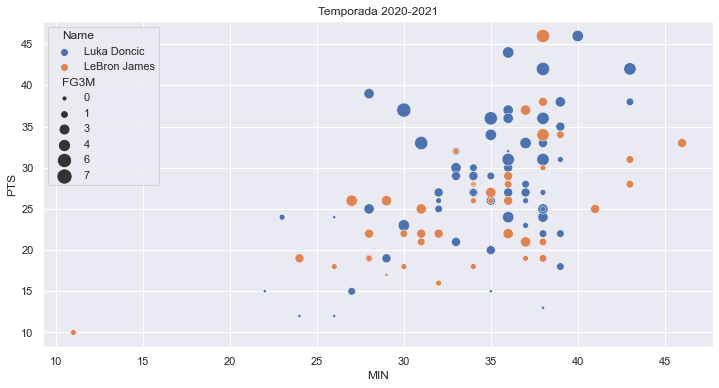

In [8]:
#Gráfico de dispersão de Minutos jogados por Pontos obtidos (Os tamanhos das bolas são o número de bolas de três daquela partida)
sns.set(rc={'figure.figsize':(12,6)})

sns.scatterplot(x="MIN", y="PTS",
                     hue="Name", size="FG3M",
                     sizes=(10, 200),
                     data=juntos[juntos['SEASON'] == 2020]).set_title('Temporada 2020-2021')

#### Gráfico de dispersão de PONTOS por MINUTOS jogados. O que entendemos disso?

Em primeiro lugar, é importante notar que esses dados são referentes apenas à temporada atual. Usar todas dificultaria a visão e teria muito mais pontos laranjados pela diferença no número bruto de temporadas disputadas.
<br/><br/>
Neste gráfico temos uma ideia intuitiva de correlação entre minutos e pontos na partida para esses jogadores já que os pontos tem um crescimento diagonal ascendente. Mas não são condensados suficientes para acreditar numa relacionamento forte. Vamos conferir:

In [9]:
pearsonr(juntos['MIN'], juntos['PTS'])

(0.4326260771187896, 1.1033217144309258e-69)

Não rejeitamos a hipótese nula e temos um índice abaixo de 50%. Vemos então que as duas variáveis são independentes, contrariando a ideia inicial.
<br/><br/>
Voltando ao gráfico temos o indicativo de tamanho dos pontos de acordo com o número de bolas de três convertidas na partida. Existem poucos pontos pequenos na parte superior da imagem. Isso ajuda a mostrar como as bolas de três são importantes (e tentadas) na NBA moderna.

### 4. Testes de hipótese

Vamos supor que as carreiras desses jogadores já terminaram. Essas são nossas populações. Como desconhecemos as médias por partida nesse cenário, vamos usar os dados que temos até hoje como se fossem amostras e responder algumas perguntas. Com isso (e mais algumas suposições) poderemos retornar à imagem da introdução e afirmar onde Luka Doncic estará no ranking em comparação ao rei do basquete.

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em PONTOS?

In [10]:
# Dados
n1 = len(ld['PTS'])
xbarra1 = np.mean(ld['PTS'])
S1 = np.var(ld['PTS'],ddof=1) #variancia

n2 = len(lj['PTS'])
xbarra2 = np.mean(lj['PTS'])
S2 = np.var(lj['PTS'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = (1 - f.cdf(fobs,n1-1,n2-1)) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias iguais. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

#Variância combinada ponderada por causa da variancia igual
S2comb = ( (n1-1)*S1 + (n2-1)*S2 ) / ( n1 + n2 - 2)
gl = ( n1 + n2 - 2)

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S2comb/n1 + S2comb/n2 )
pval = t.cdf(tobs,gl) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.454
Nesse caso, não há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias iguais. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 0.0401
Nesse caso, há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de PONTOS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic terá uma média de PONTOS por jogo maior que LeBron James. Note, no entanto, que o p-valor está muito próximo do nível de significância escolhido. Se esse valor fosse ligeiramente flexibilizado o resultado do teste seria outro. Se supormos que terão carreiras igualmente longas, então podemos acreditar que Luka estará no ranking geral da NBA em PONTOS, acima de LeBron James!!!

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em ASSISTÊNCIAS?

In [11]:
# Dados
n1 = len(ld['AST'])
xbarra1 = np.mean(ld['AST'])
S1 = np.var(ld['AST'],ddof=1) #variancia

n2 = len(lj['AST'])
xbarra2 = np.mean(lj['AST'])
S2 = np.var(lj['AST'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = (1 - f.cdf(fobs,n1-1,n2-1)) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias diferentes. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

a = S1/n1
b = S2/n2
gl = (a + b)**2 / (a**2/(n1-1) + b**2/(n2-1))

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S1/n1 + S2/n2 )
pval = 1 - t.cdf(tobs,gl)

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.0001
Nesse caso, há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias diferentes. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 0.1376
Nesse caso, não há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de ASSISTÊNCIAS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic não terá uma média de ASSISTÊNCIAS por jogo maior que LeBron James. Difícil de afirmar se teria lugar no ranking a partir desse valor. Isso exigiria um outro estudo. Mas não é um p-valor completamente proibitivo. Aceitando erro tipo-I suficiente, podemos acreditar que o jovem jogador terá um número total de assistências bastante grande.

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em ROUBOS?

In [12]:
# Dados
n1 = len(ld['STL'])
xbarra1 = np.mean(ld['STL'])
S1 = np.var(ld['STL'],ddof=1) #variancia

n2 = len(lj['STL'])
xbarra2 = np.mean(lj['STL'])
S2 = np.var(lj['STL'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = f.cdf(fobs,n1-1,n2-1) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias diferentes. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

a = S1/n1
b = S2/n2
gl = (a + b)**2 / (a**2/(n1-1) + b**2/(n2-1))

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S1/n1 + S2/n2 )
pval = 1 - t.cdf(tobs,gl)

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.0007
Nesse caso, há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias diferentes. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 1.0
Nesse caso, não há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de ROUBOS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic não terá uma média de ROUBOS por jogo maior que LeBron James. Nesse caso, o p-valor está bem distante  do nível de significância escolhido. A diferença de roubadas de bola entre os dois jogadores é significativa.

### 6. Considerações Finais

Vimos como os dois jogadores são realmente semelhantes em suas estatísticas. LeBron James jogou boa parte da carreira num momento onde toda a NBA priorizava estratégias que já não são mais utilizadas. Entretanto, a importância dos dois jogadores para seus times (e sua grandeza na liga como um todo) é palpável. 
<br/><br/>
Dada essa similaridade e tomando o ranking total das estatíticas apresentadas na introdução, usamos testes t para comparar as médias de suas estatísticas, supondo que os dois disputem um número parecido de jogos ao final de suas carreiras. Descobrimos que com um bom nível de significância Doncic estaria no topo da história da NBA em pontos nesse cenário. Nos outros quesitos tivemos resultados menos encorajadores.
<br/><br/>
Luka Doncic é muito jovem e já realizou muitas coisas até agora. Isso é animador quando olhamos para o futuro. É possível que ainda melhore, já que o auge dos jogadores normalmente é atingido em torno dos 28 anos. Entretanto, uma carreira longa e saudável como a de LeBron não é comum, descreditando uma suposição bastante importante nessas análise.